# XAI ANALYSIS ON EXPERIMENTAL PATTERNS

In [2]:
!git clone https://github.com/Marigra98/Turing-Dataset

Cloning into 'Turing-Dataset'...
remote: Enumerating objects: 5075, done.
remote: Counting objects: 100% (684/684), done.
remote: Compressing objects: 100% (619/619), done.
remote: Total 5075 (delta 76), reused 655 (delta 64), pack-reused 4391
Receiving objects: 100% (5075/5075), 365.56 MiB | 15.53 MiB/s, done.
Resolving deltas: 100% (607/607), done.
Updating files: 100% (1958/1958), done.


In [3]:
import torch
from torch import nn

torch.__version__

'1.13.1+cu116'

In [4]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
import requests
import zipfile
from pathlib import Path

In [6]:
import random
from PIL import Image

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
# loading of the trained model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2), 

            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),
        )
        
        self.linear_block = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(128*1*1, 5),
        )
        
    def forward(self, x):
        x = self.conv_block(x)
        x = x.view(x.size(0), -1)
        x = torch.nn.functional.softmax(self.linear_block(x),dim=1)
        return x
        
CNN=Net()
CNN.load_state_dict(torch.load('/content/Turing-Dataset/CNN_trained.pt',map_location=torch.device('cpu')))
CNN.eval()

Net(
  (conv_block): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): AvgPool2d(kernel_size=2

We chose to analyze 2 different experimental pattern

In [10]:
#Function to put the channel in the first position
def preprocessing(M):
    height, width = M.shape
    M=M.reshape(height, width, 1)
   
    M=np.transpose(M,(2,0,1))
   
    return M

In [11]:
#loading of the experimental patterns
import os, sys
import scipy.io

x_exp=np.empty((0,99,99))
path=['/content/Turing-Dataset/experimental_1.mat','/content/Turing-Dataset/experimental_2.mat']

for i in range(2):
    mat = scipy.io.loadmat(path[i])
    M=mat.get('immagine')

    M=preprocessing(M)
    x_exp=np.vstack((x_exp,M))

In [12]:
#predictions of the CNN on experimental patterns
predicted=np.empty((0))
prob_pred=np.zeros(shape=(2,5))
for i in range(2):
  with torch.no_grad():
      pred = CNN(torch.tensor(x_exp[i]).unsqueeze(0).unsqueeze(0).float())
      prob_pred[i,:] = pred.numpy()
      predicted=np.append(predicted,np.argmax(pred.numpy()))
  print('-Prediction for pattern n°'+str(i+1))
  print('prediction: ',np.argmax(pred.numpy()))
  print('probability: ',pred.numpy())

-Prediction for pattern n°1
prediction:  1
probability:  [[0.08800199 0.39450887 0.30267835 0.0645248  0.15028602]]
-Prediction for pattern n°2
prediction:  1
probability:  [[0.08275907 0.41724154 0.1258905  0.07335562 0.30075333]]


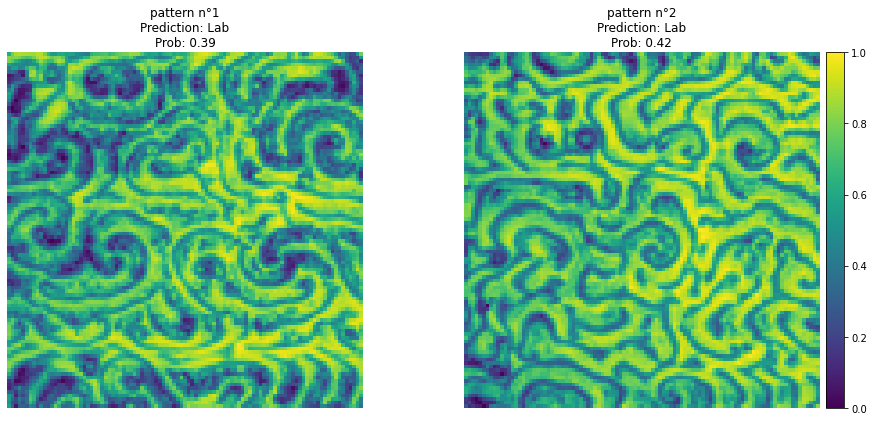

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
nome=['Homog', 'Lab', 'Mix S&S', 'R S', 'R S-W']

plt.figure(figsize=(15, 12))
for idx in range(0,2):
  ax = plt.subplot(1,2,1+idx)
  plot = ax.imshow(x_exp[idx,:,:].reshape(99,99),cmap='viridis')
  divider = make_axes_locatable(ax)
  plt.axis('off');
  plt.title('pattern n°'+str(idx+1)+'\nPrediction: '+str(nome[int(np.argmax(prob_pred[idx,:]))])+'\nProb: '+str(round(np.max(prob_pred[idx,:]),2)))
  cax = divider.append_axes("right", size="5%", pad=0.1)
  cbar=plt.colorbar(plot, cax=cax)
  if idx == 0:
    cbar.remove()



---



---



---



---



---



#***XAI***

In [14]:
!git clone https://github.com/francescanaretto/XAI-course_2021.git

Cloning into 'XAI-course_2021'...
remote: Enumerating objects: 3888, done.
remote: Counting objects: 100% (1335/1335), done.
remote: Compressing objects: 100% (1319/1319), done.
remote: Total 3888 (delta 21), reused 1325 (delta 16), pack-reused 2553
Receiving objects: 100% (3888/3888), 1005.68 MiB | 21.93 MiB/s, done.
Resolving deltas: 100% (311/311), done.
Updating files: 100% (3176/3176), done.


In [15]:
cd XAI-course_2021/Images/

/content/XAI-course_2021/Images




---



---



##LIME




In [16]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4ac4d33e62d00d163acb71b10404c0c4011d00e756924779d4f361fb5b1cdc9f
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


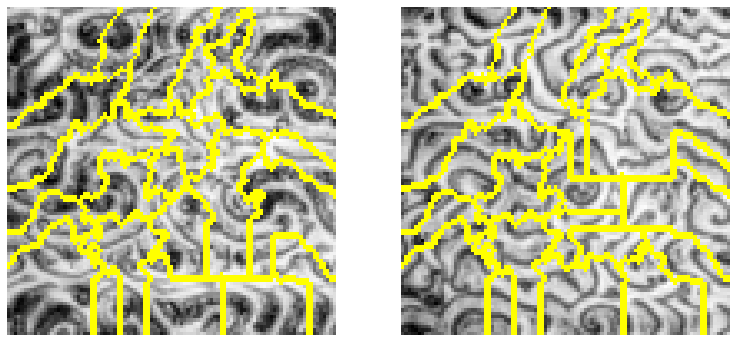

In [17]:
#segmentation function to use i LIME
from skimage.segmentation import quickshift, mark_boundaries
from skimage.color import gray2rgb

max=2
image = np.zeros(shape=(max, 99,99,3))
for idx in range(0,max):  
  image[idx,:] = gray2rgb(x_exp[idx].astype(int))


def segmentation_fn(image):
    return quickshift(image, kernel_size=5, max_dist=10)

#Plot of the segmented images
plt.figure(figsize=(20, 15))
for idx in range(0,max):
  ax=plt.subplot(1,3,idx+1)
  plot=ax.imshow(mark_boundaries(x_exp[idx,:],segmentation_fn(image[idx,:])))
  plt.axis('off');

In [18]:
from xailib.explainers.lime_explainer import LimeXAIImageExplainer
from skimage.color import label2rgb, gray2rgb, rgb2gray

# Create the Explainer
lm = LimeXAIImageExplainer(CNN)

# Fit the Explainer
lm.fit()

# Create custom classifier function if not predict 
def classifier_fn(images):
    images = torch.tensor(rgb2gray(images).reshape(-1,1,99,99)).float()
    return np.argmax(CNN(images).detach().numpy(),axis=1).reshape(-1,1)

# Explain an Instance
explanation = np.empty((0))
lime_score = np.zeros(shape=(max,99,99))
for idx in range(0,max):
  explanation = np.append(explanation,lm.explain(gray2rgb(x_exp[idx,:]), classifier_fn, segmentation_fn, num_samples=10000))
  lime_score[idx,:]=explanation[idx].heatmap

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

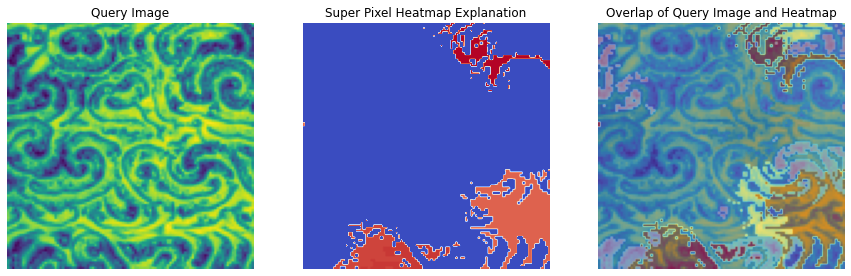

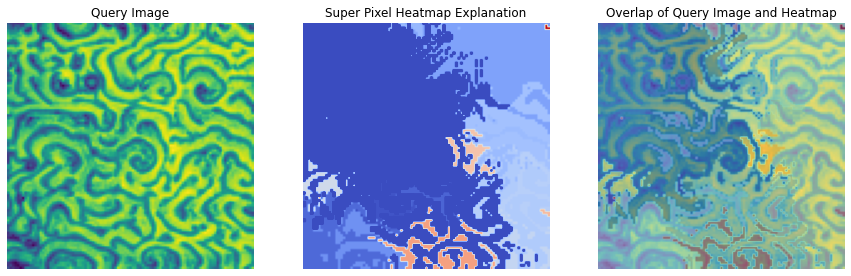

In [19]:
# Plot the results
for idx in range(0,max):
  lm.plot_lime_values(x_exp[idx], explanation[idx])

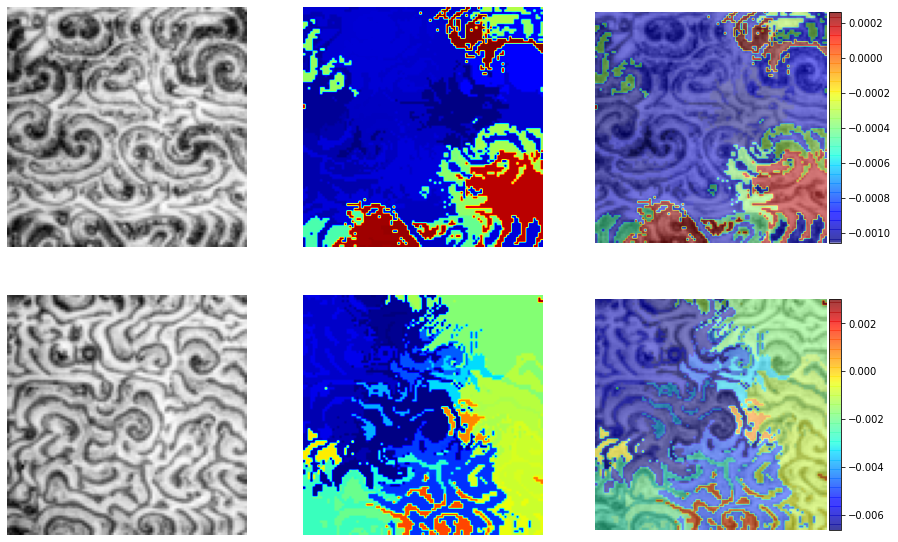

In [20]:
vmin = [-0.003,-0.003,-0.3]
vmax = [0.003,0.003,0.3]
plt.figure(figsize=(15, 15))
for idx in range(0,max):
  ax = plt.subplot(3,3,1+idx*3)
  plot = ax.imshow(x_exp[idx,:,:],cmap='gray')
  plt.axis('off');

  ax = plt.subplot(3,3,2+idx*3)
  plot = ax.imshow(lime_score[idx,:,:],cmap='jet')#, vmin =vmin[idx], vmax=vmax[idx])
  plt.axis('off');

  ax = plt.subplot(3,3,3+idx*3)
  plot2 = ax.imshow(x_exp[idx,:,:],cmap='gray')
  plot = ax.imshow(lime_score[idx,:,:],cmap='jet',alpha=0.5)#, vmin =vmin[idx], vmax=vmax[idx])
  divider = make_axes_locatable(ax)
  plt.axis('off');
  cax = divider.append_axes("right", size="5%", pad=0.05)
  cbar=plt.colorbar(plot, cax=cax)

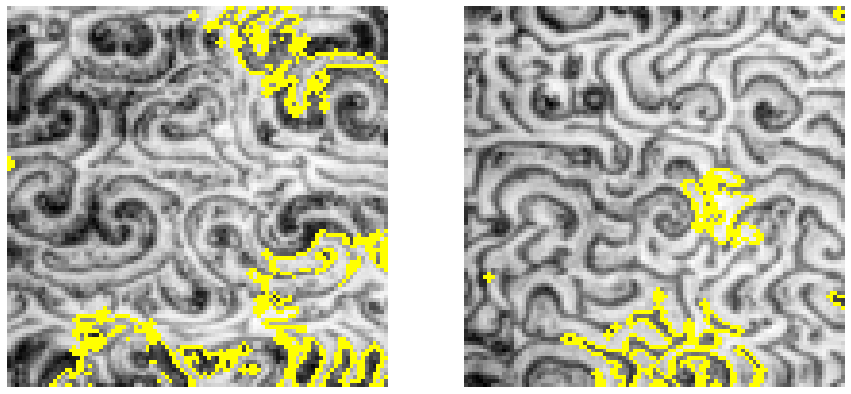

In [21]:
from skimage.segmentation import mark_boundaries


plt.figure(figsize=(15, 12))
img_boundry = np.zeros(shape=(max,99,99,3))
for idx in range(0,max):
  ax=plt.subplot(1,max,1+idx)
  temp, mask = explanation[idx].get_image_and_mask(explanation[idx].top_labels[0])
  img_boundry[idx,:] = mark_boundaries(temp, mask)
  plot=ax.imshow(img_boundry[idx,:])
  plt.axis('off');

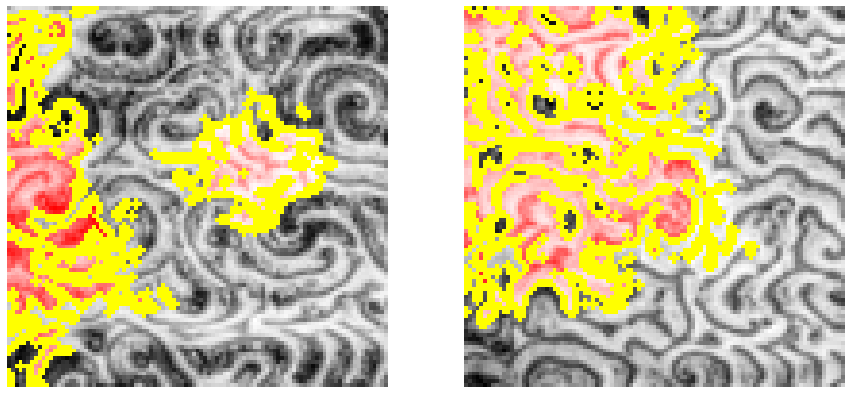

In [22]:
plt.figure(figsize=(15, 12))
img_boundry_FALSE = np.zeros(shape=(max,99,99,3))
for idx in range(0,max):
  ax=plt.subplot(1,max,1+idx)
  temp, mask = explanation[idx].get_image_and_mask(explanation[idx].top_labels[0], positive_only=False)
  img_boundry_FALSE[idx,:] = mark_boundaries(temp, mask)
  plot=ax.imshow(img_boundry_FALSE[idx,:])
  plt.axis('off');

In [23]:
# Creation of the metric for the removal of the most significant pixels
from xailib.metrics.insertiondeletion import ImageInsDel
import torch

def predict(images):
    return CNN(torch.tensor(images.reshape(1,1,99,99)).float()).detach().numpy()

step = 99
mode = 'del'
metric_REMUVED = ImageInsDel(predict, mode, step, torch.zeros_like)

In [24]:
from sklearn.metrics import auc

In [25]:
from scipy.ndimage.filters import gaussian_filter
CH = 1
def gkern(klen, nsig):
    inp = np.zeros((klen, klen))
    inp[klen//2, klen//2] = 1
    k = gaussian_filter(inp, nsig)
    kern = np.zeros((CH, CH, klen, klen))
    for i in range(CH):
        kern[i, i] = k
    return torch.from_numpy(kern.astype('float32'))

# Function that blurs input image
def blur(image, klen=11, ksig=5):

    kern = gkern(klen, ksig)
    image = torch.tensor(np.expand_dims(image, 0)).float()
    return nn.functional.conv2d(image, kern, padding=klen//2)[0,:]

In [26]:
# Creation of the metric for the addition of the most significant pixels
from xailib.metrics.insertiondeletion import ImageInsDel

def predict(images):
    return CNN(torch.tensor(images.reshape(1,1,99,99)).float()).detach().numpy()

step = 99
mode = 'ins'
metric_ADDED = ImageInsDel(predict, mode, step, blur)

Animations

In [27]:
anim_lime_REM_tot = np.empty((0))
for ii in range(0,max):
  image = x_exp[ii:ii+1]
  [score,anim_lime_REM] = metric_REMUVED(image, 99, lime_score[ii,:], rgb=False, verbose=1)
  anim_lime_REM_tot = np.append(anim_lime_REM_tot, anim_lime_REM)

In [27]:
anim_lime_REM_tot[0]

Output hidden; open in https://colab.research.google.com to view.

In [28]:
anim_lime_REM_tot[1]

Output hidden; open in https://colab.research.google.com to view.

In [28]:
anim_lime_ADD_tot = np.empty((0))
for ii in range(0,max):
  image = x_exp[ii:ii+1]
  [score,anim_lime_ADD] = metric_ADDED(image, 99, lime_score[ii,:], rgb=False, verbose=1)
  anim_lime_ADD_tot = np.append(anim_lime_ADD_tot, anim_lime_ADD)

In [30]:
anim_lime_ADD_tot[0]

Output hidden; open in https://colab.research.google.com to view.

In [31]:
anim_lime_ADD_tot[1]

Output hidden; open in https://colab.research.google.com to view.



---



---



##RISE

In [29]:
from xailib.explainers.rise_explainer import RiseXAIImageExplainer

class Rise_model_wrapper():
    def __init__(self, bb, input_size):
        self.model = bb
        self.input_size = input_size
        
    def predict(self, images):
        return self.model(torch.tensor(images).reshape(-1,1,99,99).float()).detach().numpy()
        

model = Rise_model_wrapper(CNN, (99,99))
rise = RiseXAIImageExplainer(model)

In [30]:
N = 10000
s = 15
p1 = 0.5

rise.fit(N, s, p1)

sal = np.zeros(shape=(3,5,99,99))
rise_score = np.zeros(shape=(3,99,99))
for idx in range(0,max):
  sal[idx,:] = rise.explain(x_exp[idx,:].reshape(99,99,1))
  rise_score[idx,:] = sal[idx,int(predicted[idx])]

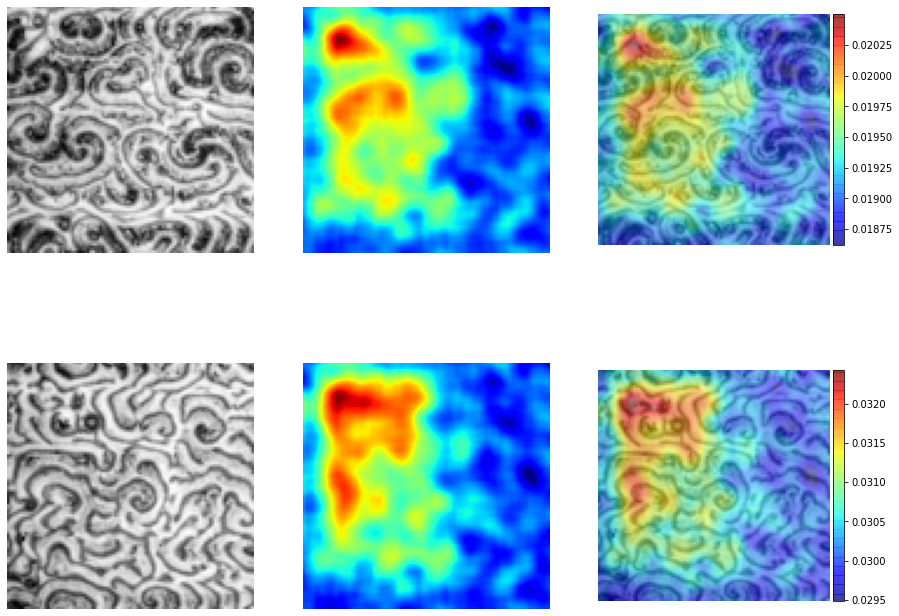

In [31]:
plt.figure(figsize=(15, 12))
for idx in range(0,max):
  ax = plt.subplot(2,3,1+idx*3)
  plot = ax.imshow(x_exp[idx,:,:],cmap='gray')
  plt.axis('off');

  ax = plt.subplot(2,3,2+idx*3)
  plot = ax.imshow(rise_score[idx,:],cmap='jet')
  plt.axis('off');

  ax = plt.subplot(2,3,3+idx*3)
  plot = ax.imshow(x_exp[idx,:,:],cmap='gray')
  plot2 = ax.imshow(rise_score[idx,:],cmap='jet',alpha=0.5)
  divider = make_axes_locatable(ax)
  plt.axis('off');
  cax = divider.append_axes("right", size="5%", pad=0.05)
  cbar=plt.colorbar(plot2, cax=cax)

Animations

In [32]:
anim_rise_REM_tot = np.empty((0))
for ii in range(0,max):
  image = x_exp[ii:ii+1]
  [score,anim_rise_REM] = metric_REMUVED(image, 99, rise_score[ii,:], rgb=False, verbose=1)
  anim_rise_REM_tot = np.append(anim_rise_REM_tot, anim_rise_REM)

In [36]:
anim_rise_REM_tot[0]

Output hidden; open in https://colab.research.google.com to view.

In [37]:
anim_rise_REM_tot[1]

Output hidden; open in https://colab.research.google.com to view.

In [33]:
anim_rise_ADD_tot = np.empty((0))
for ii in range(0,max):
  image = x_exp[ii:ii+1]
  [score,anim_rise_ADD] = metric_ADDED(image, 99, rise_score[ii,:], rgb=False, verbose=1)
  anim_rise_ADD_tot = np.append(anim_rise_ADD_tot, anim_rise_ADD)

In [39]:
anim_rise_ADD_tot[0]

Output hidden; open in https://colab.research.google.com to view.

In [40]:
anim_rise_ADD_tot[1]

Output hidden; open in https://colab.research.google.com to view.



---



---





##Integrad

In [34]:
from xailib.explainers.intgrad_explainer import IntgradImageExplainer
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create the Explainer
ig = IntgradImageExplainer(CNN)

# Fit the Explainer
ig.fit()


def preprocessing(image):
    return torch.tensor(image).unsqueeze(0).float()

def predict(image):
    return CNN(image.unsqueeze(0))

# Explain an Instance
intgrad_pt_score = np.empty((2,1,99,99))
for idx in range(0,max):
    xx = ig.explain(x_exp[idx,:], predicted[idx], 'half', preprocessing, predict, model_type='pytorch').reshape(99,99)
    intgrad_pt_score[idx,:] = xx

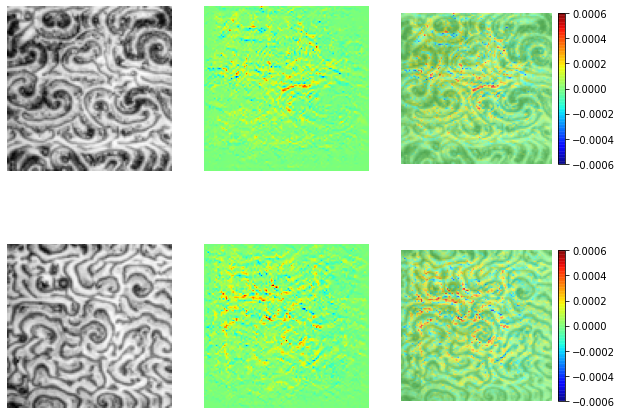

In [35]:
plt.figure(figsize=(10,8))
for idx in range(0,max):
  ax=plt.subplot(2,3,1+idx+idx*2)
  plot=ax.imshow(x_exp[idx,:],cmap='gray')
  plt.axis('off');

  ax = plt.subplot(2,3,2+idx+idx*2)
  plot=ax.imshow(intgrad_pt_score[idx,0,:], cmap='jet', vmin=-0.0008, vmax=0.0008)
  plt.axis('off');

  ax = plt.subplot(2,3,3+idx+idx*2)
  plot=ax.imshow(x_exp[idx,:].reshape(99,99),cmap='gray')
  plot1=ax.imshow(intgrad_pt_score[idx,0,:],cmap='jet',alpha=0.65, vmin=-0.0006, vmax=0.0006)
  divider = make_axes_locatable(ax)
  plt.axis('off');
  cax = divider.append_axes("right", size="5%", pad=0.08)
  cbar=plt.colorbar(plot1, cax=cax)

Animations

In [36]:
scores=np.zeros(shape=(3,5,100))
anim_integrad_REM=np.empty((0))
for idx in range(0,max):
    image = x_exp[ii:ii+1]
    [scores_temp,anim_temp] = metric_REMUVED(image, 99, intgrad_pt_score[idx,:], rgb=False, verbose=1)
    anim_integrad_REM= np.append(anim_integrad_REM,anim_temp)

In [ ]:
anim_integrad_REM[0]

Output hidden; open in https://colab.research.google.com to view.

In [37]:
anim_integrad_REM[1]

Output hidden; open in https://colab.research.google.com to view.

In [38]:
scores=np.zeros(shape=(3,5,100))
anim_integrad_ADD=np.empty((0))
for idx in range(0,max):
    image = x_exp[ii:ii+1]
    [scores_temp,anim_temp] = metric_ADDED(image, 99, intgrad_pt_score[idx,:], rgb=False, verbose=1)
    anim_integrad_ADD= np.append(anim_integrad_ADD,anim_temp)

In [ ]:
anim_integrad_ADD[0]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
anim_integrad_ADD[1]

Output hidden; open in https://colab.research.google.com to view.

----
----

##GradCAM


In [39]:
!pip install ttach

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from xailib.explainers.gradcam_explainer import GradCAMImageExplainer

img = x_exp

# Create the Explainer
explainer = GradCAMImageExplainer(CNN)

# Fit the Explainer
explainer.fit([list(CNN.modules())[-15]])

# Explain an Instance
gradcam_pt_score = np.zeros(shape=(2,99,99))
attr = np.zeros(shape=(2,99,99))
for idx in range(0,max):
    attr[idx,:] = explainer.explain(torch.tensor(img[idx,:]).reshape(-1,1,99,99).float(), int(predicted[idx]), model_type='pytorch')
    gradcam_pt_score[idx,:] = attr[idx,:]

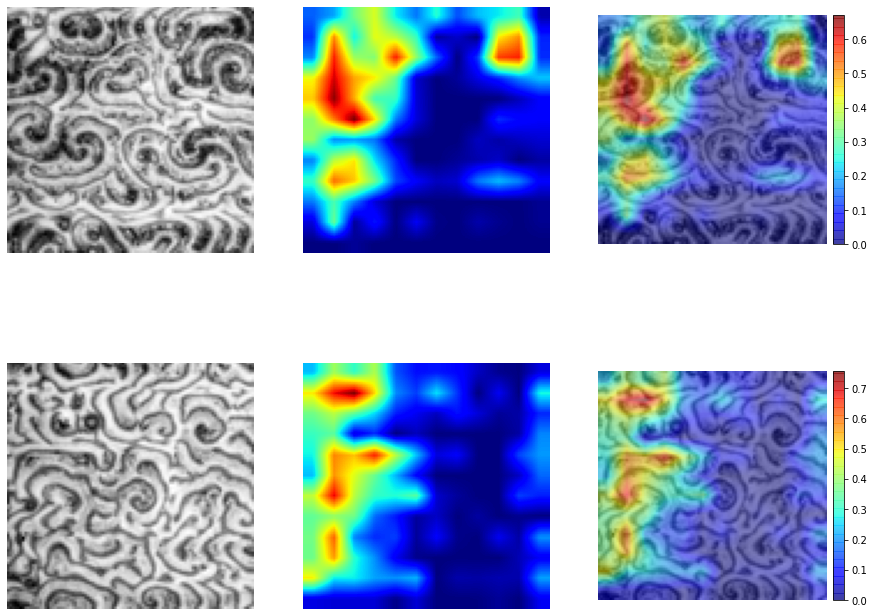

In [41]:
plt.figure(figsize=(15, 12))
for idx in range(0,max):
  ax = plt.subplot(2,3,1+idx*3)
  plot=ax.imshow(img[idx,:].reshape(99,99),cmap='gray')
  plt.axis('off');
  
  ax = plt.subplot(2,3,2+idx*3)
  plot=ax.imshow(attr[idx,:],cmap='jet')
  plt.axis('off');
  

  ax = plt.subplot(2,3,3+idx*3)
  plot=ax.imshow(img[idx,:],cmap='gray')
  plot1=ax.imshow(attr[idx,:],cmap='jet',alpha=0.5)
  divider = make_axes_locatable(ax)
  plt.axis('off');
  cax = divider.append_axes("right", size="5%", pad=0.08)
  cbar=plt.colorbar(plot1, cax=cax)

Animations

In [42]:
scores=np.zeros(shape=(3,5,100))
anim_GradCAM_REM=np.empty((0))
for idx in range(0,max):
    image = x_exp[ii:ii+1]
    [scores_temp,anim_temp] = metric_REMUVED(image, 99, gradcam_pt_score[idx,:], rgb=False, verbose=1)
    anim_GradCAM_REM= np.append(anim_GradCAM_REM,anim_temp)

In [43]:
anim_GradCAM_REM[0]

Output hidden; open in https://colab.research.google.com to view.

In [44]:
anim_GradCAM_REM[1]

Output hidden; open in https://colab.research.google.com to view.

In [45]:
scores=np.zeros(shape=(3,5,100))
anim_GradCAM_ADD=np.empty((0))
for idx in range(0,max):
    image = x_exp[ii:ii+1]
    [scores_temp,anim_temp] = metric_ADDED(image, 99, gradcam_pt_score[idx,:], rgb=False, verbose=1)
    anim_GradCAM_ADD= np.append(anim_GradCAM_ADD,anim_temp)

In [46]:
anim_GradCAM_ADD[0]

Output hidden; open in https://colab.research.google.com to view.

In [47]:
anim_GradCAM_ADD[1]

Output hidden; open in https://colab.research.google.com to view.

---
---


#COMPARISON AMONG ALL THE METHODS

plot of all explanation maps

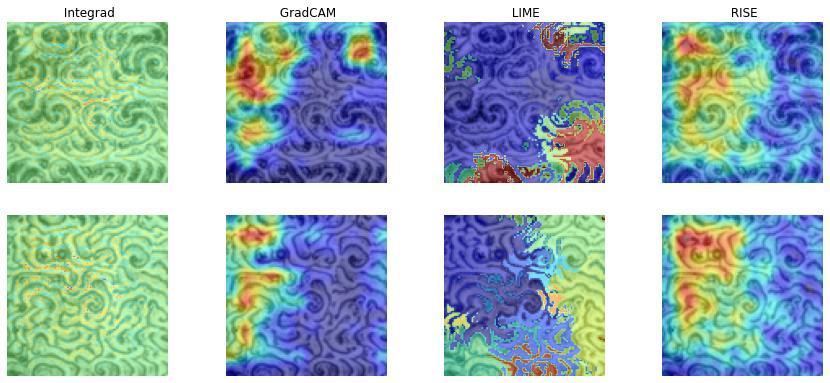

In [48]:
metodo =['Integrad', 'GradCAM', 'LIME', 'RISE']
plt.figure(figsize=(15, 6.5))

for idx in range(0,max):
  methods = [intgrad_pt_score[idx,:].reshape(99,99),gradcam_pt_score[idx,:],lime_score[idx,:],rise_score[idx,:]]
  for a in range(0,4):
    ax = plt.subplot(2,4,1+idx*4+a)
    plot2 = ax.imshow(x_exp[idx,:],cmap='gray')
    if a ==0:
      plot = ax.imshow(methods[a],cmap='jet', vmin=-0.0008, vmax=0.0008,alpha=0.5)
    else:
      plot = ax.imshow(methods[a],cmap='jet',alpha=0.5)
    divider = make_axes_locatable(ax)
    plt.axis('off');
    if idx ==0:
      plt.title(' '+str(metodo[a]))
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar=plt.colorbar(plot, cax=cax)
    cbar.remove()

Plot of the methods' metrics for each analyzed pattern, for the pixel insertion

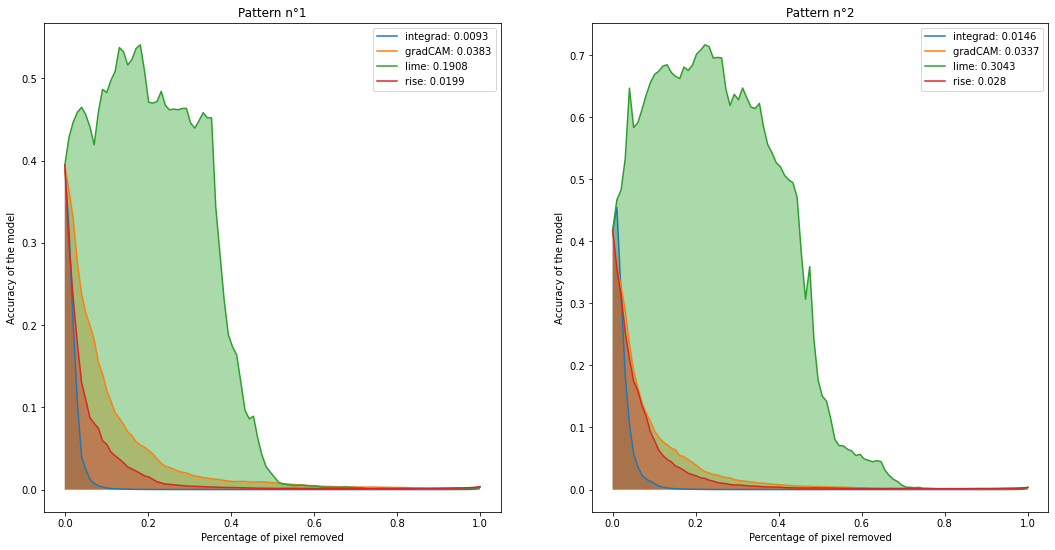

In [49]:
plt.figure(figsize=(18, 9))
for ii in range(0,max):
  image = x_exp[ii:ii+1]
  y_int = metric_REMUVED(image, 99, intgrad_pt_score[ii,:], rgb=False)
  y_lime = metric_REMUVED(image, 99, lime_score[ii,:], rgb=False)
  y_rise = metric_REMUVED(image, 99, rise_score[ii,:], rgb=False)
  y_gradCAM = metric_REMUVED(image, 99, gradcam_pt_score[ii,:], rgb=False)
  x = np.arange(len(y_lime))*step/(99*99)
  x[-1] = 1.0
  

  
  ax = plt.subplot(1,2,ii+1)
  plt.title('Pattern n°'+str(ii+1))
  for nome, y in zip(['integrad','gradCAM','lime','rise'],[y_int,y_gradCAM, y_lime,y_rise]):
      plt.plot(x, y, label=f'{nome}: {np.round(auc(x, y),4)}')
      plt.fill_between(x, y, alpha=0.4)
      plt.xlabel('Percentage of pixel removed')
      plt.ylabel('Accuracy of the model')
      plt.legend();

Plot of the methods' metrics for each analyzed pattern, for the pixel insertion

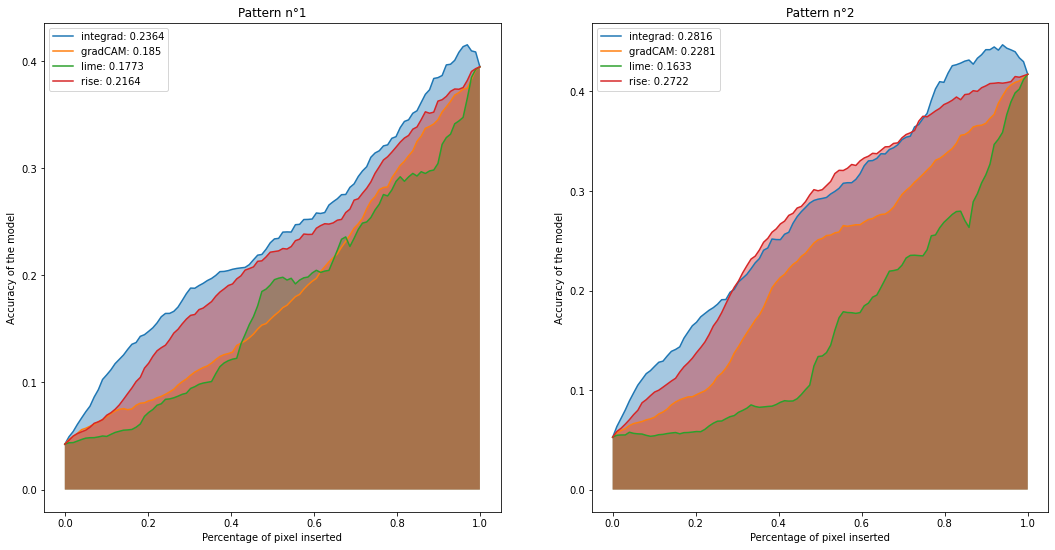

In [50]:
plt.figure(figsize=(18, 9))
for ii in range(0,max):
  image = x_exp[ii:ii+1]
  y_int = metric_ADDED(image, 99, intgrad_pt_score[ii,:], rgb=False)
  y_lime = metric_ADDED(image, 99, lime_score[ii,:], rgb=False)
  y_rise = metric_ADDED(image, 99, rise_score[ii,:], rgb=False)
  y_gradCAM = metric_ADDED(image, 99, gradcam_pt_score[ii,:], rgb=False)
  x = np.arange(len(y_lime))*step/(99*99)
  x[-1] = 1.0
  

  ax = plt.subplot(1,2,ii+1)
  plt.title('Pattern n°'+str(ii+1))
  for nome, y in zip(['integrad','gradCAM','lime','rise'],[y_int,y_gradCAM, y_lime,y_rise]):
      plt.plot(x, y, label=f'{nome}: {np.round(auc(x, y),4)}')
      plt.fill_between(x, y, alpha=0.4)
      plt.xlabel('Percentage of pixel inserted')
      plt.ylabel('Accuracy of the model')
      plt.legend();